In [6]:
from utils.collaborative_filtering import compute_item_similarity, adjusted_cosine_similarity

In [1]:
import numpy as np
import pandas as pd



path = '../data/movie_lens_small/ratings.csv'

movies = pd.read_csv(path)

# en este prepro me falta borrar los items que tienen poco overlapp y 
# los usuarios que tienen pocas interacciones

user_item_matrix = pd.pivot_table(movies,
                                index='userId',
                                columns='movieId',
                                values='rating')

#me guardo los raw ids, para luego volver a convertir
raw_users_ids = user_item_matrix.index
raw_item_ids = user_item_matrix.columns

user_item_matrix.reset_index(inplace= True, drop= True)
user_item_matrix.columns = np.arange(user_item_matrix.shape[1])

user_item_matrix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Columns: 9724 entries, 0 to 9723
dtypes: float64(9724)
memory usage: 45.3 MB


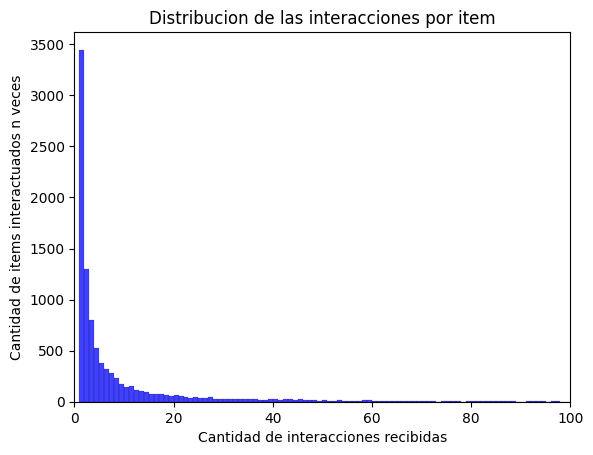

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

item_counts = movies['movieId'].value_counts()

# Create a histogram
sns.histplot(item_counts, bins=range(1, item_counts.max() + 2), color='blue')
plt.xlabel('Cantidad de interacciones recibidas')
plt.ylabel('Cantidad de items interactuados n veces')
plt.title('Distribucion de las interacciones por item')
# plt.yticks(range(0, item_counts.max() + 1, 5000))
plt.xlim(0, 100)
plt.show()

In [3]:
min_overlap_items = 2
min_overlap_users = 2

# voy a tomar una parte pequeña del dataset por el tiempo de computo
items_overlap = movies.iloc[0:2000, 0:2000].groupby('movieId')['timestamp'].count() >= min_overlap_items
users_overlap = movies.iloc[0:2000, 0:2000].groupby('userId')['timestamp'].count() >= min_overlap_users


items_id_idx = items_overlap[items_overlap].index
users_id_idx = users_overlap[users_overlap].index


filtered_movies = movies[movies['movieId'].isin(items_id_idx) & movies['userId'].isin(users_id_idx)]

filtered_movies

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
2200,18,99114,4.0,1455051144
2213,18,106782,3.0,1471043729
2216,18,109374,4.0,1455735216
2217,18,109487,4.5,1455050087


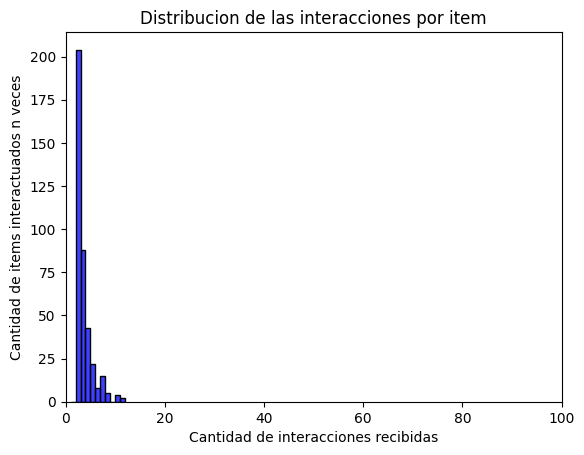

In [4]:
item_counts = filtered_movies['movieId'].value_counts()

# Create a histogram
sns.histplot(item_counts, bins=range(1, item_counts.max() + 2), color='blue')
plt.xlabel('Cantidad de interacciones recibidas')
plt.ylabel('Cantidad de items interactuados n veces')
plt.title('Distribucion de las interacciones por item')
# plt.yticks(range(0, item_counts.max() + 1, 5000))
plt.xlim(0, 100)
plt.show()

In [5]:
# vuelvo a generar la matriz users-items pero con un valor minimo de solapamiento

user_item_matrix = pd.pivot_table(filtered_movies,
                                index='userId',
                                columns='movieId',
                                values='rating')

#me guardo los raw ids, para luego volver a convertir
raw_users_ids = user_item_matrix.index
raw_item_ids = user_item_matrix.columns

user_item_matrix.reset_index(inplace= True, drop= True)
user_item_matrix.columns = np.arange(user_item_matrix.shape[1])

user_item_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 391 entries, 0 to 390
dtypes: float64(391)
memory usage: 55.1 KB


In [7]:
from utils.collaborative_filtering import compute_item_similarity

test_movies = user_item_matrix
similaridades_test_movies=compute_item_similarity(test_movies)
similaridades_test_movies[1]

{14: 0.9314858425557404,
 92: 0.9314858425557404,
 91: 0.8964706753385699,
 84: 0.8203165882047839,
 49: 0.6987265628678266,
 85: 0.6518433347386445,
 108: 0.6132490658271604,
 129: 0.45265993020466866,
 103: 0.29261191374911455,
 45: 0.18652929831245613,
 69: 0.014810309694184398}

In [8]:
test_movies.iloc[:,[14,1]]

,14,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,4.0,NaN
5,4.0,4.0
6,NaN,NaN
7,5.0,4.0
8,NaN,NaN
9,NaN,NaN


In [ ]:
test_movies = np.array([    [1    ,      2,      -2, -1],
                            [2    , np.nan, np.nan,  -2],
                            [np.nan, np.nan,      2,   2]])




a, _ =adjusted_cosine_similarity(test_movies, 1, 2)
a

In [ ]:
n_vecinos = 3

for item in range(test_movies.shape[1]):
    sim = dict(list(similaridades_test_movies[item].items())[:n_vecinos])
    for i, (key, value) in enumerate(sim.items()):
        print(f"posicion {i}: {value}")
    break


In [ ]:
np.mean(test_movies, axis=1)[1]


In [ ]:
user_ratings_mean = np.mean(test_movies, axis=1)

neighbors = 3  # Change this to the desired number

# Use a dictionary comprehension to extract the first n items for each inner dictionary
sim = {key: dict(list(sorted(value.items(), key=lambda item: item[1], reverse=True))[:neighbors]) 
               for key, value in similaridades_test_movies.items()}

sim_sum = sum(sim[0].values())




# keys = [k for k in sim[0].keys()]

# user_ratings_mean[0] + 

result = [value1 * value2 for (value1, value2) in zip(sim[0].values(), rating_norm.values())]


In [ ]:
sim[0]

In [ ]:
rating_norm


test_movies[] - user_ratings_mean[0]

In [ ]:
list(sim[1].values())[0]* list(dict2.values())[0]

In [ ]:
test_movies

In [ ]:
test_movies[0,[k for k in sim[0].keys()][0]]

In [ ]:
test_movies.to_numpy()[0, 507]

In [ ]:
test_movies.iloc[0, 506]

In [ ]:
test_movies

In [ ]:
movies.loc[(movies["userId"] == 1) & (movies["movieId"] == 507)]


In [ ]:
test_movies.loc[0, 505]

In [ ]:
test_movies